In [65]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import yfinance as yf
from datetime import datetime


In [66]:

# download the data
df = yf.download('KKGI.JK', start='2021-01-01', end=datetime.now())

y = df['Close'].fillna(method='ffill')
y = y.values.reshape(-1, 1)

# scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(y)
y = scaler.transform(y)



[*********************100%%**********************]  1 of 1 completed
/var/folders/r1/_dwxrcfn431751qw7slczn2m0000gn/T/ipykernel_90917/4171940205.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y = df['Close'].fillna(method='ffill')


In [67]:
# Save the forecast results to CSV
df.to_csv('KKGI.JK.csv')

In [68]:
df.head

<bound method NDFrame.head of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-01-04  256.756744  308.880310  245.173752  308.880310  259.313873   
2021-01-05  308.880310  308.880310  287.644775  301.158295  252.831039   
2021-01-06  299.227814  301.158295  281.853271  295.366791  247.968887   
2021-01-07  281.853271  299.227814  277.992279  295.366791  247.968887   
2021-01-08  293.436279  293.436279  276.061768  276.061768  231.761734   
...                ...         ...         ...         ...         ...   
2024-05-27  484.000000  520.000000  482.000000  510.000000  510.000000   
2024-05-28  510.000000  530.000000  500.000000  505.000000  505.000000   
2024-05-29  505.000000  510.000000  480.000000  498.000000  498.000000   
2024-05-30  498.000000  510.000000  490.000000  505.000000  505.000000   
2024-05-31  505.000000  515.000000  496.000000  496.000000  496.000000   

       

In [69]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,824.000000,824.000000,824.000000,824.000000,824.000000,8.240000e+02
mean,398.119654,407.185979,388.569114,397.327126,372.253972,3.411583e+06
std,114.290596,117.836390,110.456638,113.893915,117.784741,5.700996e+06
min,222.007721,223.938217,220.077225,222.007721,186.381836,4.351000e+03
25%,289.575287,299.227814,279.922791,289.575287,249.344269,5.600098e+05
50%,382.239380,389.961395,376.223938,382.239380,372.130234,1.585598e+06
75%,474.903473,487.451752,465.250977,473.455589,456.545868,4.191267e+06
max,738.416992,752.895752,709.459473,733.590759,695.061829,7.257087e+07


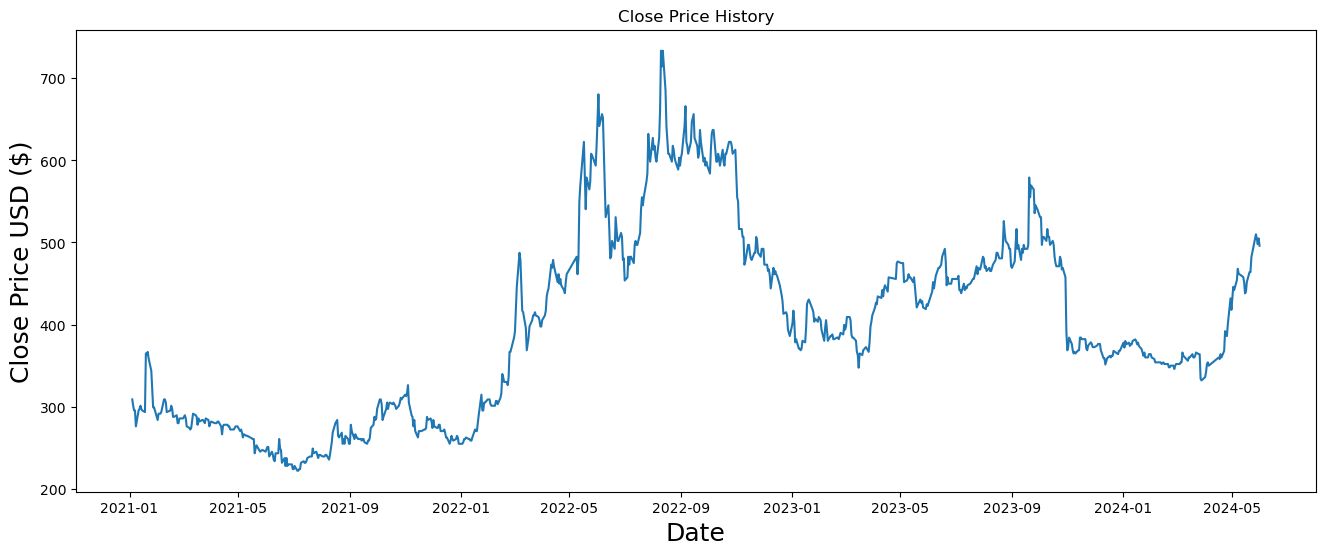

In [70]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [71]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

783

In [72]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.16981132],
       [0.15471696],
       [0.14339621],
       [0.14339621],
       [0.10566036],
       [0.14339621],
       [0.14716982],
       [0.15471696],
       [0.14716982],
       [0.14339621],
       [0.13962261],
       [0.27924528],
       [0.27547167],
       [0.28301888],
       [0.26792453],
       [0.23773582],
       [0.19245282],
       [0.15094342],
       [0.15094342],
       [0.14339621],
       [0.12075471],
       [0.13584906],
       [0.13584906],
       [0.13584906],
       [0.13962261],
       [0.16981132],
       [0.16981132],
       [0.16226417],
       [0.13962261],
       [0.14339621],
       [0.15471696],
       [0.14716982],
       [0.12830186],
       [0.12830186],
       [0.13207546],
       [0.11320756],
       [0.11320756],
       [0.12452831],
       [0.12452831],
       [0.12452831],
       [0.12830186],
       [0.13207546],
       [0.12452831],
       [0.10566036],
       [0.10188681],
       [0.09811321],
       [0.10188681],
       [0.135

In [73]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape


[array([0.16981132, 0.15471696, 0.14339621, 0.14339621, 0.10566036,
       0.14339621, 0.14716982, 0.15471696, 0.14716982, 0.14339621,
       0.13962261, 0.27924528, 0.27547167, 0.28301888, 0.26792453,
       0.23773582, 0.19245282, 0.15094342, 0.15094342, 0.14339621,
       0.12075471, 0.13584906, 0.13584906, 0.13584906, 0.13962261,
       0.16981132, 0.16981132, 0.16226417, 0.13962261, 0.14339621,
       0.15471696, 0.14716982, 0.12830186, 0.12830186, 0.13207546,
       0.11320756, 0.11320756, 0.12452831, 0.12452831, 0.12452831,
       0.12830186, 0.13207546, 0.12452831, 0.10566036, 0.10188681,
       0.09811321, 0.10188681, 0.13584906, 0.13207546, 0.12830186,
       0.10943396, 0.12452831, 0.11698111, 0.12075471, 0.12075471,
       0.11698111, 0.11320756, 0.12452831, 0.12075471, 0.10566036])]
[0.11320756405279958]

[array([0.16981132, 0.15471696, 0.14339621, 0.14339621, 0.10566036,
       0.14339621, 0.14716982, 0.15471696, 0.14716982, 0.14339621,
       0.13962261, 0.27924528, 0.27

In [74]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

723/723 [==============================] - 20s 25ms/step - loss: 0.0052


In [75]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse


2/2 [==============================] - 1s 10ms/step


23.216404970576736

/var/folders/r1/_dwxrcfn431751qw7slczn2m0000gn/T/ipykernel_90917/2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


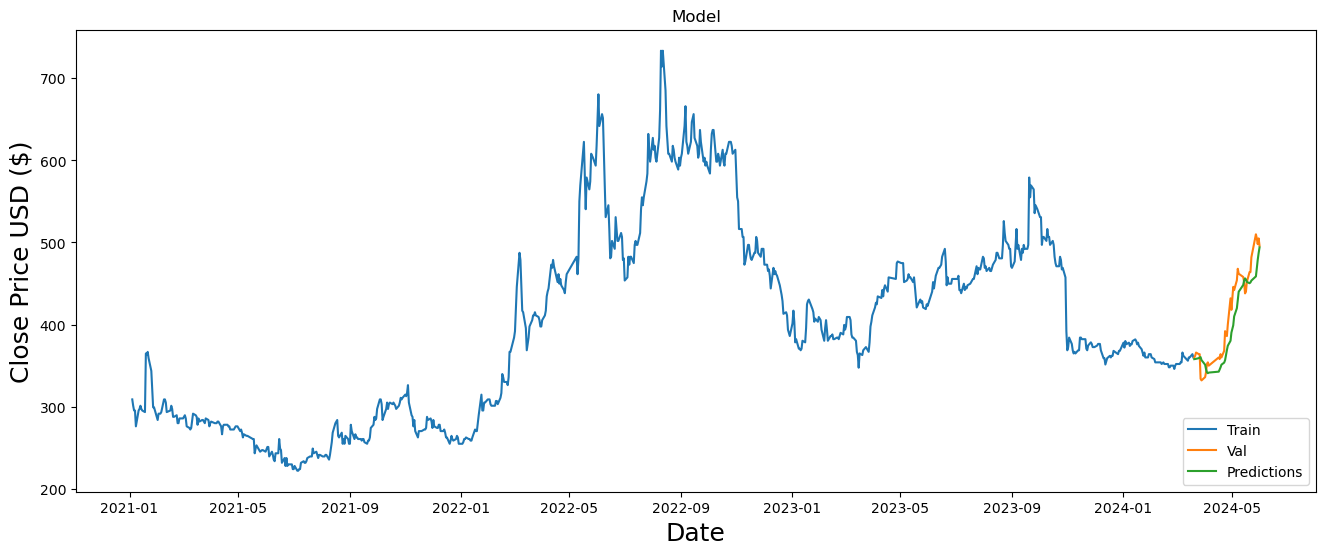

In [76]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [77]:
# Save the forecast results to CSV
df.to_csv('valid.csv')

In [78]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2024-03-20,360.0,357.917572
2024-03-21,362.0,358.084747
2024-03-22,366.0,358.323792
2024-03-25,364.0,359.110992
2024-03-26,364.0,359.814484
2024-03-27,334.0,360.390106
2024-03-28,332.0,356.757568
2024-04-01,336.0,351.140289
2024-04-02,342.0,345.720001


[*********************100%%**********************]  1 of 1 completed


Epoch 1/100
7/7 [==============================] - 3s 106ms/step - loss: 0.0749 - val_loss: 0.1674
Epoch 2/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0108 - val_loss: 0.0047
Epoch 3/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0091 - val_loss: 0.0357
Epoch 4/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0044 - val_loss: 0.0374
Epoch 5/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0030 - val_loss: 0.0047
Epoch 6/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0017 - val_loss: 0.0035
Epoch 7/100
7/7 [==============================] - 0s 11ms/step - loss: 9.9909e-04 - val_loss: 0.0028
Epoch 8/100
7/7 [==============================] - 0s 11ms/step - loss: 8.7497e-04 - val_loss: 0.0057
Epoch 9/100
7/7 [==============================] - 0s 11ms/step - loss: 7.6297e-04 - val_loss: 0.0102
Epoch 10/100
7/7 [==============================] - 0s 11ms/step - loss: 7.9867e-04 - val_loss: 0.0052
Ep

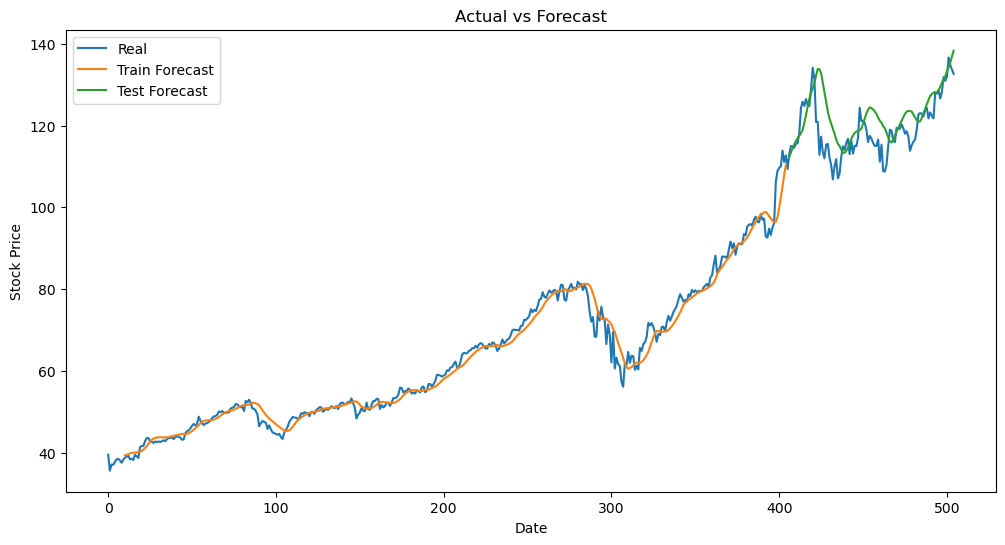

In [89]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from datetime import datetime, timedelta  

# Load historical data for the period before 2021
data = yf.download('AAPL', start='2019-01-01', end='2021-01-01')

# Preprocess the Data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data[['Close']])

# Create Dataset
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 10
X, y = create_dataset(data_scaled, time_step)

# Reshape input to be [samples, time steps, features] which is required for LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

# Splitting data into training and testing sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the Model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

# Make Predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform to get actual values
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform([y_train])
y_test = scaler.inverse_transform([y_test])

# Plot the Results
train_predict_plot = np.empty_like(data_scaled)
train_predict_plot[:, :] = np.nan
train_predict_plot[time_step:len(train_predict)+time_step, :] = train_predict

test_predict_plot = np.empty_like(data_scaled)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(data_scaled) - len(test_predict):, :] = test_predict

plt.figure(figsize=(12,6))
plt.plot(scaler.inverse_transform(data_scaled), label='Real')
plt.plot(train_predict_plot, label='Train Forecast')
plt.plot(test_predict_plot, label='Test Forecast')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual vs Forecast')
plt.show()

# Prepare data for DataFrame
real_data = scaler.inverse_transform(data_scaled).flatten()
train_data = np.full_like(real_data, np.nan)
train_data[time_step:len(train_predict)+time_step] = train_predict.flatten()
test_data = np.full_like(real_data, np.nan)
test_data[len(real_data) - len(test_predict):] = test_predict.flatten()

# Create DataFrame
df = pd.DataFrame({
    'Date': data.index,
    'Real': real_data,
    'Train': train_data,
    'Test': test_data
})

# Save DataFrame to CSV
df.to_csv('historical_stock_forecast.csv', index=False)
